#### Analysis On Movie Dataset To Find Out The Relationship Between Movie Gross Sales And Other Factors  (budget, company, votes, runtime)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # setting a default size for plots

pd.options.mode.chained_assignment = None # Disabling the SettingWithCopy warning
pd.options.display.float_format = '{:,.0f}'.format

# Now we need to read in the data
data = pd.read_csv('movies.csv')

In [2]:
df= data.copy()  # Creating a copy of the data

In [3]:
# Now let's take a look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000",NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120


#### Cleaning and Preparing the Dataset

In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


As we can see there are 3 columns with missing values `rating`, `budget`, and `gross`. lets give it a deeper look.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df[df['rating'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7,"1,300",Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,NaN,"109,749",Diversity Music,95
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",7,230,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8,"237,000",Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,"11,487,676",Bavaria Film,149
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7,"3,000",Wim Wenders,Robert Kramer,Allen Garfield,West Germany,NaN,"3,700",Gray City,121
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6,235,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,"100,000",NaN,NaN,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000",NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120


In [7]:
df[df['score'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,"1,000,000",NaN,Dow Jazz Films,121
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,"10,000",NaN,NaN,90
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120


In [8]:
df[df['votes'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,"1,000,000",NaN,Dow Jazz Films,121
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,"10,000",NaN,NaN,90
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120


In [9]:
df[df['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6,840,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,"5,006",Basilisk Communications,92
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7,"22,000",Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,"3,945,217",Baby Cow Productions,112
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",7,"1,300",Teng Cheng,NaN,Guangtao Jiang,China,NaN,"240,663,149",Beijing Enlight Pictures,110


In [10]:
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,NaN,History,1983,"February 15, 1983 (Canada)",8,79,Tom Logan,Tom Logan,NaN,Canada,"323,562",NaN,CTV,55


In [11]:
df[df['country'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,6,"93,000",Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,6,"104,000",Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",6,"1,900",Richard Grieco,Noel Ashman,Ace Young,NaN,"2,500,000","50,400",Growing Tree Productions,77


In [12]:
df[df['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
408,A Night in Heaven,R,Drama,1983,"November 18, 1983 (United States)",4,"1,200",John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,NaN,"5,563,663",NaN,83
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6,235,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,"100,000",NaN,NaN,92
469,Last Plane Out,PG,Action,1983,"September 23, 1983 (United States)",4,131,David Nelson,Ernest Tidyman,Jan-Michael Vincent,United States,NaN,NaN,NaN,92
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6,270,Richard C. Sarafian,Michael Kane,Gary Busey,United States,"221,000","2,687,148",NaN,110
969,Modern Girls,PG-13,Comedy,1986,"November 7, 1986 (United States)",6,"1,300",Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,NaN,"604,849",NaN,84
1033,P.O.W. the Escape,R,Action,1986,"April 4, 1986 (United States)",5,533,Gideon Amir,Malcolm Barbour,David Carradine,United States,NaN,"2,497,233",NaN,90
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5,677,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,"8,000,000","1,097,333",NaN,95
1594,Lost Angels,R,Drama,1989,"May 5, 1989 (United States)",6,881,Hugh Hudson,Michael Weller,Donald Sutherland,United States,NaN,"1,247,946",NaN,116
1630,Staying Together,R,Comedy,1989,"November 10, 1989 (United States)",6,761,Lee Grant,Monte Merrick,Sean Astin,United States,NaN,"4,348,025",NaN,91
1806,Streets,R,Action,1990,"January 19, 1990 (United States)",6,712,Katt Shea,Andy Ruben,Christina Applegate,United States,NaN,"1,510,053",NaN,85


In [13]:
df[df['runtime'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,6,"93,000",Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,6,"104,000",Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5,"41,000",Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,"40,000,000","38,084,162",Lakeshore Entertainment,NaN
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750",NaN,Embi Productions,NaN


In [14]:
df[df['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",7,"21,000",Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,"21,202,829",Metro-Goldwyn-Mayer (MGM),134
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",7,"26,000",Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,"101,300,000",Columbia Pictures,111
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6,"14,000",James Bridges,Aaron Latham,John Travolta,United States,NaN,"46,918,287",Paramount Pictures,132
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",7,"33,000",Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,"19,853,892",Warner Bros.,102
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6,"5,100",Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,"34,326,249",Stephen Friedman/Kings Road Productions,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",7,903,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,"25,818,882",NaN,135
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,"13,266",Roxwell Films,87
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90


It appears the budget column has most of the missing values(about 2000+). Dropping these rows means we would be loosing a good percentage of our data (28%). The idea of this analysis is to determine if there is a correlation between gross sales and the other factors, with budget being one of the major influencers. Therefore, rather than dropping we could replace them with the average budget since the values are randomly missing. 

But before we handle the missing budget, let's handle the other columns with few missing values by dropping them from the dataset.

In [15]:
# dropping columns where we have missing values except in the 'budget' column
columns_to_dropna = df.columns.difference(['budget'])
df.dropna(subset=columns_to_dropna, inplace=True)

In [16]:
# Replacing missing values in budget column with the mean
avg_budget = df['budget'].mean()
df['budget'].fillna(avg_budget, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   float64
 12  gross     7412 non-null   float64
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 926.5+ KB


Now we have no more missing values.

In [18]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

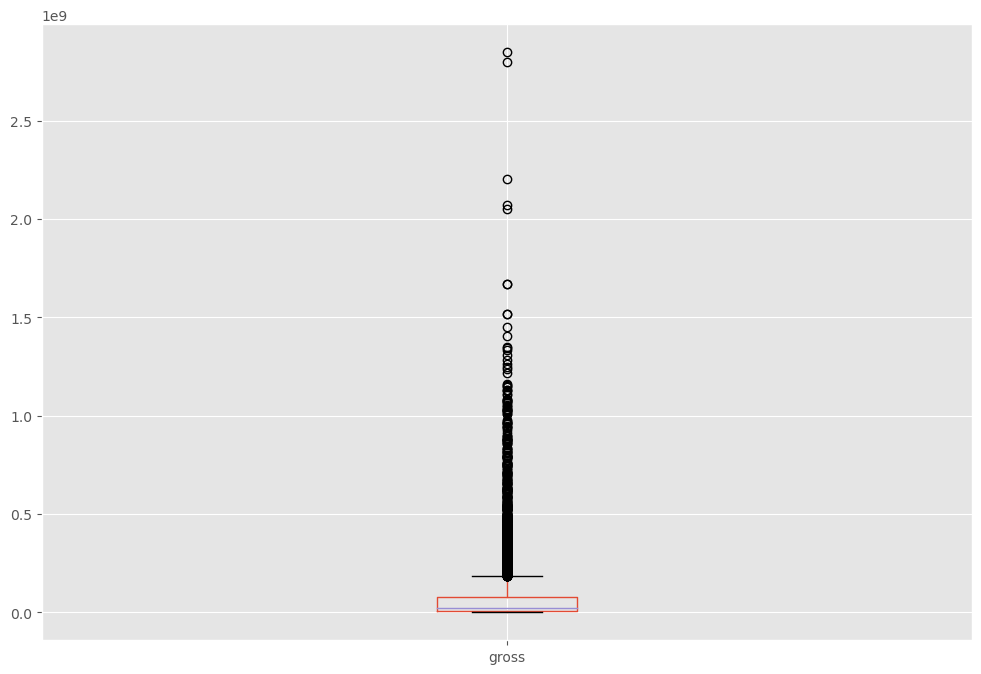

In [19]:
# Are there any Outliers?
df.boxplot(column=['gross'])

In [20]:
# Checking For Duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",7,"42,000",Chris Sanders,Michael Green,Harrison Ford,Canada,"135,000,000","111,105,497",20th Century Studios,100
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",7,"3,700",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000","461,421,559",Beijing Diqi Yinxiang Entertainment,149
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,"2,400",Scott Teems,Scott Teems,Shea Whigham,United States,"36,009,170","3,661",Prowess Pictures,98
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,"36,009,170","413,378",Pryor Entertainment,120


In [21]:
# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",8,"1,100,000",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000","2,847,246,203",Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,"903,000",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000","2,797,501,328",Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",8,"1,100,000",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000","2,201,647,264",Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",8,"876,000",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000","2,069,521,700",Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,"897,000",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000","2,048,359,754",Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6,"2,900",Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,"36,009,170","1,672",Polygram Filmed Entertainment,87
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7,"37,000",Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,"36,009,170","1,605",Balboa Entertainment,110
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,"5,200",Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,"36,009,170","1,400",British Broadcasting Corporation (BBC),103
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,"36,009,170",682,Roxwell Films,93


A closer look into the data set shows that for some reason, the year in the `year` column does not match the year in the `released` column. Let's fix this.

In [22]:
# df['released_year'] = df['released']
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",7,"42,000",Chris Sanders,Michael Green,Harrison Ford,Canada,"135,000,000","111,105,497",20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",7,"3,700",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000","461,421,559",Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,"2,400",Scott Teems,Scott Teems,Shea Whigham,United States,"36,009,170","3,661",Prowess Pictures,98,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,"36,009,170","413,378",Pryor Entertainment,120,2020


Dataset has succefully been cleaned.

In [23]:
# df = df_

#### Finding Correlation

<Axes: xlabel='gross', ylabel='budget'>

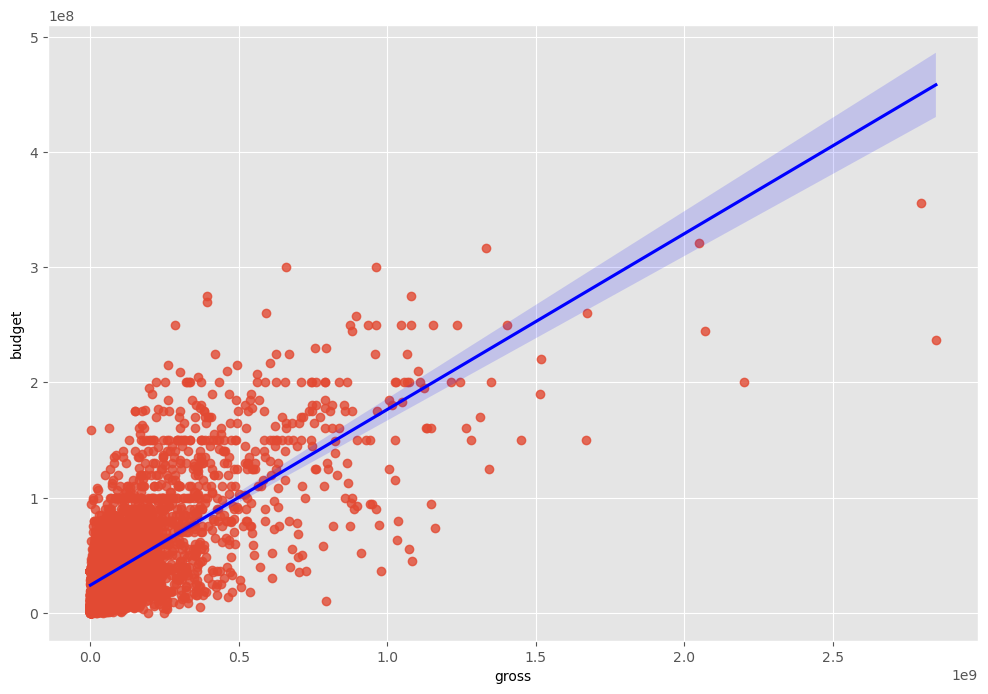

In [24]:
# I have a hypothesis that gross has a good relationship with budget lets see this with a regression line
sns.regplot(x="gross", y="budget", data=df, line_kws = {'color':'blue'})

This shows us that budget and gross have a positive relationship and it appears, the higher the budget, the higher the gross earnings. Further analysis would tell us how much correlation

In [25]:
# Correlation Matrix between all numeric columns
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_9176\3165281626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,yearcorrect
year,1,0,0,0,0,0,1
score,0,1,0,0,0,0,0
votes,0,0,1,0,1,0,0
budget,0,0,0,1,1,0,0
gross,0,0,1,1,1,0,0
runtime,0,0,0,0,0,1,0
yearcorrect,1,0,0,0,0,0,1


A quick glance shows there are positive correlation between some factors. To see this clearly a heatmap would do. 

As usual, there would always be a perfect correlation between every factor and itself. Hence the diagonal 1s.

C:\Users\user\AppData\Local\Temp\ipykernel_9176\1279345923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


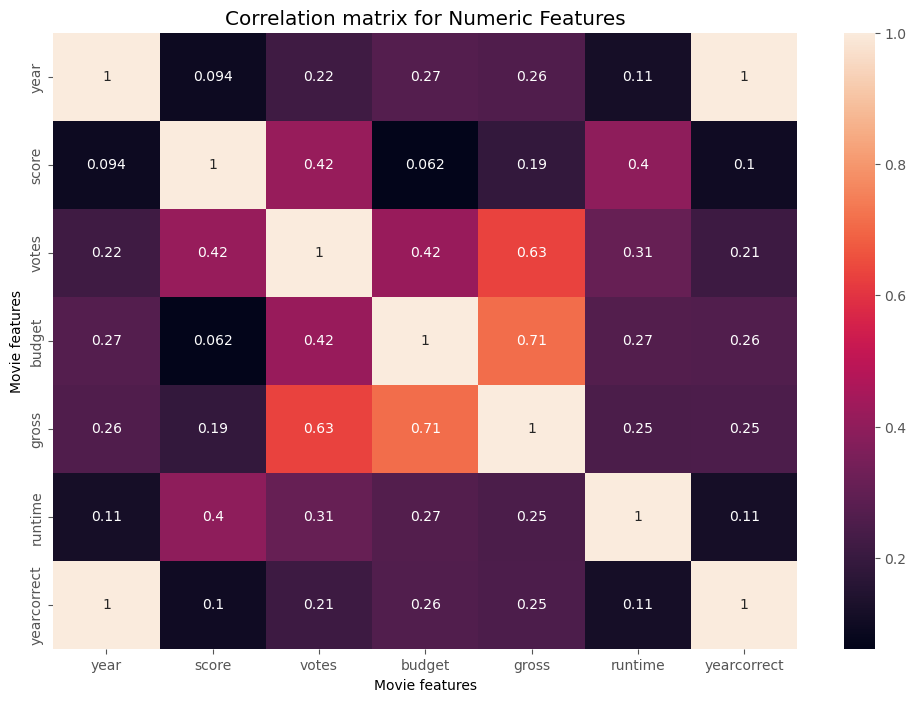

In [26]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

Here we are! Heatmap has given a clear view. Boxes with brighter colors shows positive correlation and other negative. 

This heatmap only shows the correlation between numeric columns. Lets take non numeric columns such as ratings and company name into consideration.


In [27]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",7,"42,000",Chris Sanders,Michael Green,Harrison Ford,Canada,"135,000,000","111,105,497",20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",7,"3,700",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000","461,421,559",Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,"2,400",Scott Teems,Scott Teems,Shea Whigham,United States,"36,009,170","3,661",Prowess Pictures,98,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,"36,009,170","413,378",Pryor Entertainment,120,2020


In [28]:
df.copy()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",7,"42,000",Chris Sanders,Michael Green,Harrison Ford,Canada,"135,000,000","111,105,497",20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",7,"3,700",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000","461,421,559",Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,"2,400",Scott Teems,Scott Teems,Shea Whigham,United States,"36,009,170","3,661",Prowess Pictures,98,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,"36,009,170","413,378",Pryor Entertainment,120,2020


In [29]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6372,6,6,1980,1654,8,"927,000",2471,3851,979,52,"19,000,000","46,998,772",2179,146,1980
1,5373,6,1,1980,1445,6,"65,000",2169,1564,306,53,"4,500,000","58,853,106",686,104,1980
2,4956,4,0,1980,1718,9,"1,200,000",1063,2464,1642,53,"18,000,000","538,375,067",1446,124,1980
3,277,4,4,1980,1445,8,"221,000",1248,1920,2112,53,"3,500,000","83,453,539",1697,88,1980
4,993,6,4,1980,1494,7,"108,000",1010,499,387,53,"6,000,000","39,846,344",1665,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,2020,978,7,"42,000",438,2838,895,6,"135,000,000","111,105,497",17,100,2020
7652,5586,3,0,2020,482,7,"3,700",1048,1602,2645,8,"80,000,000","461,421,559",350,149,2020
7653,6265,6,5,2020,89,5,"2,400",2404,3726,2300,53,"36,009,170","3,661",1786,98,2020
7656,6792,5,4,2020,1831,5,294,2399,3719,2241,53,"36,009,170","413,378",1788,120,2020


In [30]:
pd.options.display.float_format = '{:,.2f}'.format

df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.00,-0.01,0.02,0.01,-0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.12,0.03,0.02,0.02,0.02,0.01,-0.00,0.00,0.03,-0.16,-0.13,-0.08,0.07,0.03
genre,0.02,0.12,1.00,-0.08,0.03,0.05,-0.15,-0.02,0.01,-0.00,-0.03,-0.32,-0.24,-0.07,-0.04,-0.08
year,0.01,0.03,-0.08,1.00,0.00,0.09,0.22,-0.02,-0.01,-0.03,-0.08,0.27,0.26,-0.02,0.11,1.00
released,-0.01,0.02,0.03,0.00,1.00,0.04,0.02,-0.00,-0.00,0.02,-0.02,0.02,0.00,-0.01,-0.00,-0.00
score,0.01,0.02,0.05,0.09,0.04,1.00,0.42,0.01,0.02,-0.00,-0.13,0.06,0.19,-0.00,0.40,0.10
votes,0.01,0.02,-0.15,0.22,0.02,0.42,1.00,0.00,0.00,-0.02,0.07,0.42,0.63,0.13,0.31,0.21
director,0.01,0.01,-0.02,-0.02,-0.00,0.01,0.00,1.00,0.30,0.04,0.01,-0.01,-0.01,0.00,0.02,-0.02
writer,0.01,-0.00,0.01,-0.01,-0.00,0.02,0.00,0.30,1.00,0.02,0.01,-0.03,-0.02,0.00,-0.00,-0.01
star,0.01,0.00,-0.00,-0.03,0.02,-0.00,-0.02,0.04,0.02,1.00,-0.02,-0.02,-0.00,0.01,0.01,-0.03


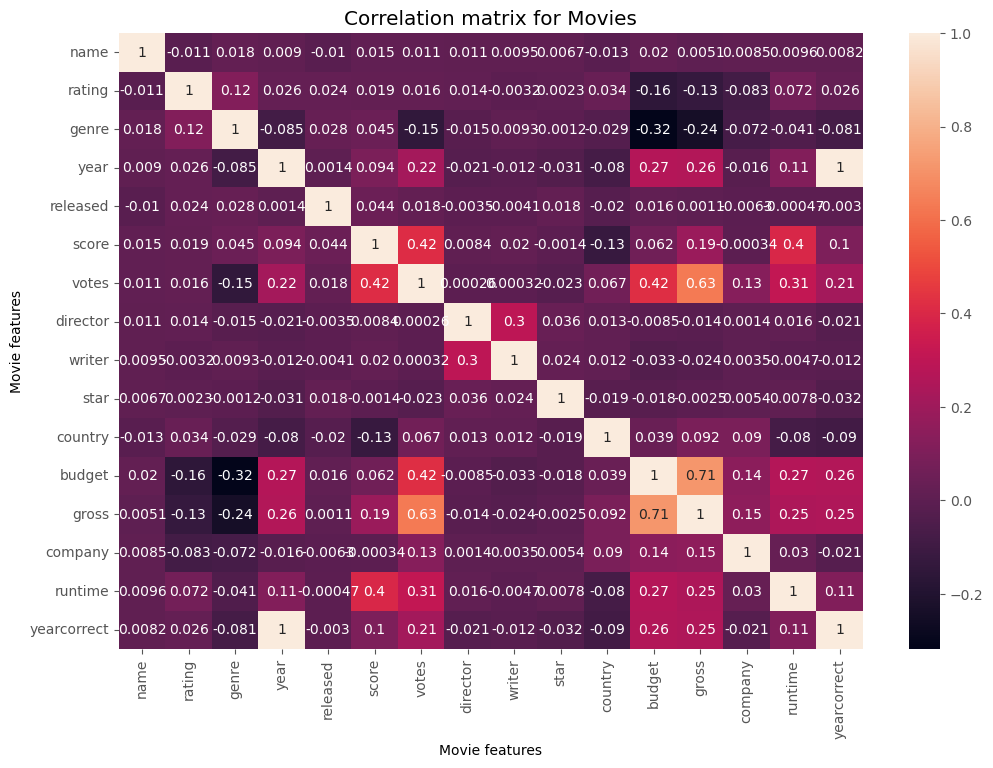

In [31]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [32]:
# Lets unstack to see each pair
corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

name         name           1.00
             rating        -0.01
             genre          0.02
             year           0.01
             released      -0.01
                            ... 
yearcorrect  budget         0.26
             gross          0.25
             company       -0.02
             runtime        0.11
             yearcorrect    1.00
Length: 256, dtype: float64


In [33]:
# Sorting the unsatcked result
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

genre        budget        -0.32
budget       genre         -0.32
genre        gross         -0.24
gross        genre         -0.24
budget       rating        -0.16
                            ... 
year         year           1.00
genre        genre          1.00
rating       rating         1.00
runtime      runtime        1.00
yearcorrect  yearcorrect    1.00
Length: 256, dtype: float64


In [34]:
# We can now take a look at the ones that have a high correlation (> 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes        gross         0.63
gross        votes         0.63
             budget        0.71
budget       gross         0.71
yearcorrect  year          1.00
year         yearcorrect   1.00
name         name          1.00
company      company       1.00
gross        gross         1.00
budget       budget        1.00
country      country       1.00
star         star          1.00
writer       writer        1.00
director     director      1.00
votes        votes         1.00
score        score         1.00
released     released      1.00
year         year          1.00
genre        genre         1.00
rating       rating        1.00
runtime      runtime       1.00
yearcorrect  yearcorrect   1.00
dtype: float64


Here we have what we have been looking for. `Budget` and `Votes` are the only 2 variables that have a strong positive correlation with `gross`.

One would have thought a `company` name or the `star` would have the highest correlation but it turns out those assumptions are wrong. 

Now that we have established the these correlations, let's see what other things our data could tell us. 

In [35]:
# Looking at the top 10 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:10]

CompanyGrossSumSorted['gross_display'] = CompanyGrossSumSorted['gross'].apply(lambda x: '{:,}'.format(x))

CompanyGrossSumSorted

,gross,gross_display
company,,
Warner Bros.,"56,329,179,122.00","56,329,179,122.0"
Universal Pictures,"52,514,188,890.00","52,514,188,890.0"
Columbia Pictures,"43,008,941,346.00","43,008,941,346.0"
Paramount Pictures,"40,493,607,415.00","40,493,607,415.0"
Twentieth Century Fox,"40,257,053,857.00","40,257,053,857.0"
Walt Disney Pictures,"36,327,887,792.00","36,327,887,792.0"
New Line Cinema,"19,867,862,616.00","19,867,862,616.0"
Marvel Studios,"15,065,592,411.00","15,065,592,411.0"
DreamWorks Animation,"11,873,612,858.00","11,873,612,858.0"


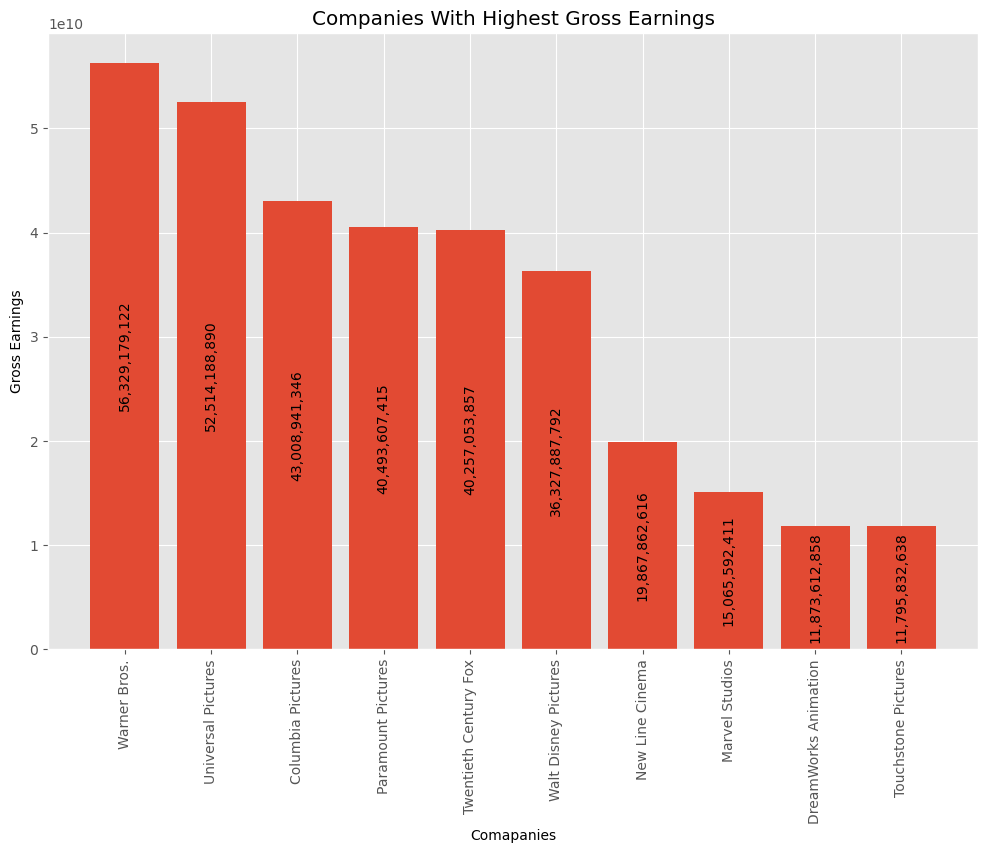

In [36]:
bars = plt.bar(CompanyGrossSumSorted.index, CompanyGrossSumSorted['gross'])

plt.title("Companies With Highest Gross Earnings")

plt.xlabel("Comapanies")

plt.ylabel("Gross Earnings")

plt.xticks(rotation=90)


# Add values on top of the bars.
for i, bar in enumerate(bars):
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval/2, '{:,}'.format(int(yval)),
             ha='center', va='center', rotation = 'vertical')

`Warner Bros`, `Universal Pictures`, `Columbia Pictures`, `Paramount Pictures` and `Twentieth Century Fox` are the top 5 compaines with the highest total gross earnings with `Warner bros` coming first at `56bn`and the others `40bn+`. 